<a href="https://colab.research.google.com/github/lexarflash8g/Jupyternotebooks/blob/master/FASTAI%20-lesson5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai

In [0]:
import pandas as pd
from fastai.collab import CollabDataBunch, collab_learner

In [18]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
data_dir = base_dir + 'movielens/'
data_dir
pwd
pwd

NameError: ignored

In [9]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
import os
os.chdir(data_dir)

In [0]:
user,item,title = 'userId','movieId','title'

In [0]:

y_range = [0,5.5]


In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)


In [16]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,0.776625,0.787431,00:19
1,0.620991,0.728978,00:30
2,0.363178,0.728537,00:23


In [17]:
path=Config.data_path()/'ml-100k'

NameError: ignored

In [18]:
data_dir

'/content/gdrive/My Drive/data/movielens/'

In [0]:
import os
os.chdir(base_dir)

In [24]:
movie_dir = root_dir'/data/ml-100k/'

SyntaxError: ignored

In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'data/ml-100k'

In [30]:
ratings = pd.read_csv('u.data', delimiter='\t', header=None,
                     names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [31]:
movies = pd.read_csv('u.item', delimiter='|', encoding='latin-1', header=None,
                     names=[item, 'title', 'date', 'N','url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [32]:
len(ratings)

100000

In [33]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=32, valid_pct=0.1, item_name=title)

In [35]:
data.show_batch()

userId,title,target
361,Cape Fear (1991),3.0
804,"Blob, The (1958)",4.0
584,Mystery Science Theater 3000: The Movie (1996),4.0
303,Event Horizon (1997),3.0
144,Gandhi (1982),5.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


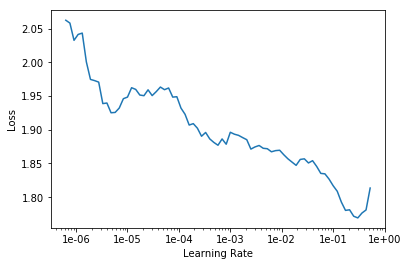

In [38]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [39]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.916476,0.936876,00:12
1,0.855181,0.859719,00:12
2,0.757646,0.816260,00:11
3,0.650344,0.794725,00:11
4,0.541139,0.794928,00:11


In [0]:
learn.save('dotprod')

In [0]:
learn.load('dotprod');

In [43]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1647, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1647, 1)
)

In [46]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

In [47]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()

In [0]:
movie_ratings = [(b, i, mean_ratings.loc[i]) for i, b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [51]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3349),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3264),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2823), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2821), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2676), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2551), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2473), 'Kansas City (1996)', 2.260869565217391),
 (tensor(-0.2392), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2359), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2357), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2336), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2333), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2305), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2289), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.2288), 'Bever

In [53]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6080), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5851), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5568), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5285), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5273), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5067), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5018), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5000), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4959), 'Wrong Trousers, The (1993)', 4.466101694915254),
 (tensor(0.4935), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4742), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.4709), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4702), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4563), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4546), 'Godfather, The (1972)', 4.283292978208232)]

In [54]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [55]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0, fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f, i in zip(fac0, top_movies)]

In [62]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0912), 'Chinatown (1974)'),
 (tensor(1.0702), 'Godfather, The (1972)'),
 (tensor(1.0673), 'Close Shave, A (1995)'),
 (tensor(1.0632), 'Casablanca (1942)'),
 (tensor(1.0098), "One Flew Over the Cuckoo's Nest (1975)"),
 (tensor(1.0085), 'Lawrence of Arabia (1962)'),
 (tensor(1.0069),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(0.9927), 'Wrong Trousers, The (1993)'),
 (tensor(0.9811), 'Apocalypse Now (1979)'),
 (tensor(0.9570), 'Ran (1985)')]

In [64]:
sorted(movie_comp, key=itemgetter(0))[:10]


[(tensor(-1.3375), 'Home Alone 3 (1997)'),
 (tensor(-1.2340), 'Flipper (1996)'),
 (tensor(-1.2195), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.1635), 'Jungle2Jungle (1997)'),
 (tensor(-1.1588), "McHale's Navy (1997)"),
 (tensor(-1.1258), 'Congo (1995)'),
 (tensor(-1.1095), 'Leave It to Beaver (1997)'),
 (tensor(-1.1049), 'Bio-Dome (1996)'),
 (tensor(-1.0867), 'Cutthroat Island (1995)'),
 (tensor(-1.0522), 'D3: The Mighty Ducks (1996)')]

In [0]:
movie_comp = [(f, i) for f, i in zip(fac1, top_movie)]

In [67]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1836), 'Raiders of the Lost Ark (1981)'),
 (tensor(1.1294), 'Braveheart (1995)'),
 (tensor(1.0329), 'Titanic (1997)'),
 (tensor(0.9415), "It's a Wonderful Life (1946)"),
 (tensor(0.9078), 'American President, The (1995)'),
 (tensor(0.8994), 'Forrest Gump (1994)'),
 (tensor(0.8793), 'Independence Day (ID4) (1996)'),
 (tensor(0.8517), 'Hunt for Red October, The (1990)'),
 (tensor(0.8496), 'Indiana Jones and the Last Crusade (1989)'),
 (tensor(0.8481), 'Return of the Jedi (1983)')]

In [68]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8760), 'Trainspotting (1996)'),
 (tensor(-0.8640), 'Keys to Tulsa (1997)'),
 (tensor(-0.8630), 'Jude (1996)'),
 (tensor(-0.8030), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.7969), 'Serial Mom (1994)'),
 (tensor(-0.7887), 'Brazil (1985)'),
 (tensor(-0.7822), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.7600), 'Exotica (1994)'),
 (tensor(-0.7528), 'Sweet Hereafter, The (1997)'),
 (tensor(-0.7414), 'Spice World (1997)')]

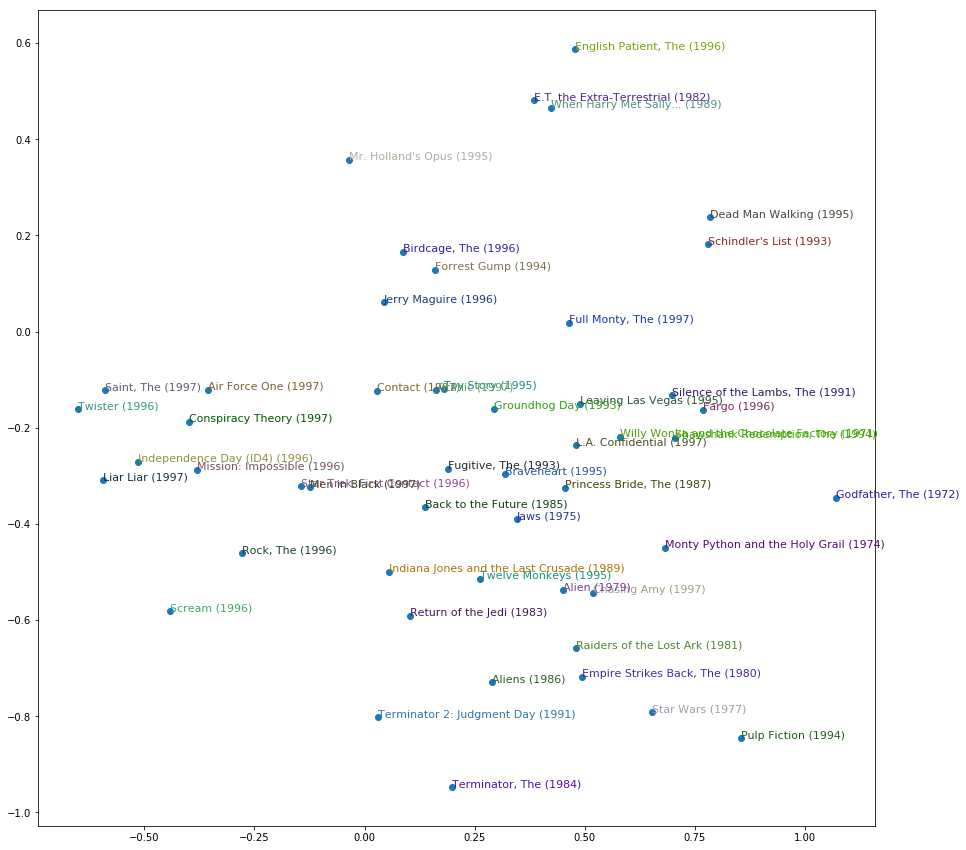

In [74]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X,Y)
for i, x, y in zip(top_movies[idxs], X, Y):
            plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
!pip install jovian --upgrade


  Stored in directory: /root/.cache/pip/wheels/67/9f/b0/b841f81da3f8c9919ed232fa14bba397c5c38fa8df5d125d8a
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built jovian uuid


In [0]:
import jovian

In [77]:
jovian.commit()

[jovian] Error: Failed to detect Juptyer notebook. Skipping..


In [79]:
!jovian clone a1b40b04f5174a18bd05b17e3dffb0f0 

[jovian] NOTE: Jovian is current in beta, so if you face any issues, 
      please report them here: https://github.com/swiftace-ai/jovian-py/issues
[jovian] Fetching a1b40b04f5174a18bd05b17e3dffb0f0 ..
[jovian] Downloading files..
[jovian] Cloned successfully to '03-logistic-regression'. 

Next steps:
$ cd 03-logistic-regression   # Enter the directory
$ jovian install     # Install dependencies
$ conda activate <env_name> # Activate environment
$ jupyter notebook   # Start Jupyter

Replace <env_name> with the name of your environment (without the '<' & '>')
Jovian uses Anaconda ( https://conda.io/ ) under the hood, 
so please make sure you have it installed and added to path. 
* If you face issues with `jovian install`, try `conda env update`.
* If you face issues with `conda activate`, try `source activate <env_name>` 
  or `activate <env_name>` to activate the virtual environment.

NOTE: Jovian is current in beta, so if you face any issues, 
      please report them here: https://g

In [80]:
cd movielens-fastai

[Errno 2] No such file or directory: 'movielens-fastai'
/content


In [81]:
jovian install

SyntaxError: ignored

In [82]:
conda activate movielens-fastai

SyntaxError: ignored

In [0]:
%matplotlib inline
from fastai.basics import *


In [8]:
gzip

<module 'gzip' from '/usr/lib/python3.6/gzip.py'>

In [85]:
path_dir

NameError: ignored

In [0]:
import os
os.chdir(base_dir)

In [15]:
base_dir

'/content/gdrive/My Drive/data/mnist'

In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'data/mnist'

In [21]:
path.ls()

NameError: ignored

In [0]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)

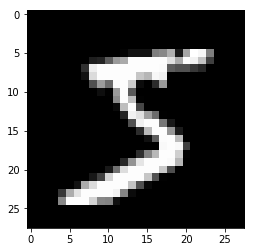

In [24]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [25]:
x_train, y_train, x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [0]:
bs = 64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [27]:
x ,y =next(iter(data.train_dl))
x.shape, y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [0]:
class Mnist_Logistic(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin = nn.Linear(784, 10, bias=True)
    
    def forward(self, xb): return self.lin(xb)

In [0]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [0]:
model = Mnist_Logistic().cuda()

In [31]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [32]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [33]:
model(x).shape

torch.Size([64, 10])

In [34]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [0]:
lr=2e-2

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x,y,lr):
  wd = 1e-5
  y_hat = model(x)
  w2 = 0.
  for p in model.parameters(): w2 += (p**2).sum()
  loss = loss_func(y_hat, y) + w2*wd
  loss.backward()
  with torch.no_grad():
      for p in model.parameters():
        p.sub_(lr * p.grad)
        p.grad.zero_()
  return loss.item()

In [0]:
losses = [update(x,y,lr) for x,y in data.train_dl]

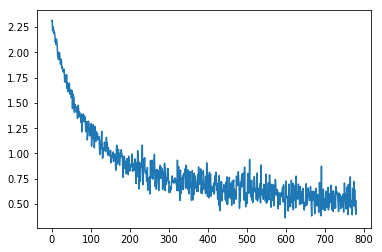

In [43]:
plt.plot(losses)

In [0]:
class Mnist_NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(784, 50, bias=True)
    self.lin2 = nn.Linear(50, 10, bias=True)
    
    def forward(self, xb):
      x = self.lin1(xb)
      x = F.relu(x)
      return self.lin2(x)
    

In [0]:
model = Mnist_NN().cuda()

In [51]:
losses = [update(x,y,lr) for x,y in data.train_dl]


NotImplementedError: ignored

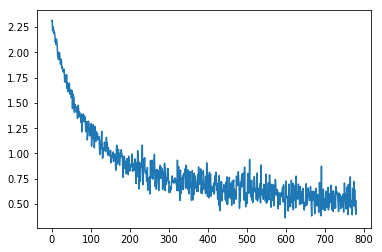

In [0]:
plt.plot(losses)

In [0]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)

In [0]:
%debug

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,1e-2)

In [0]:
learn.recorder.plot_lr(show_moms=True)

In [1]:
learn.recorder.plot_losses()

NameError: ignored